# TOPIC MODELLING 

In [42]:
import os
print(os.getcwd())


h:\000_Projects\01_GitHub\05_PythonProjects\PubMedResearch\Notebooks


In [43]:
import sys
import os

# Go one level up
sys.path.append(os.path.abspath(".."))


In [44]:
import os
print(os.getcwd())


h:\000_Projects\01_GitHub\05_PythonProjects\PubMedResearch\Notebooks


In [45]:
from Functions.parquet_save_and_merge import save_and_merge_in_batches
from Functions.parquet_reader import read_parquet_in_batches_with_progress

In [46]:
# File path and batch size
#file_path = "Data/2.Processed/ModellingData/P5_final_new.parquet"
file_path = "../Data/2.Processed/ModellingData/P6_merged_tokens.parquet"
batch_size = 100_000  # Define your desired chunk size

# Read the Parquet file in batches with progress tracking
df = read_parquet_in_batches_with_progress(file_path, batch_size)

# Check the resulting DataFrame
print(f"\nFinal DataFrame with {len(df)} rows:")
df.head()

Processing Batches:   0%|          | 0/1057871 [00:00<?, ?rows/s]

Processed Chunk 1: 100000 rows
Processed Chunk 2: 100000 rows
Processed Chunk 3: 100000 rows
Processed Chunk 4: 100000 rows
Processed Chunk 5: 100000 rows
Processed Chunk 6: 100000 rows
Processed Chunk 7: 100000 rows
Processed Chunk 8: 100000 rows
Processed Chunk 9: 100000 rows
Processed Chunk 10: 100000 rows
Processed Chunk 11: 57871 rows

Final DataFrame with 1057871 rows:


,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date,...,cleaned_abstract_tokens_simple,cleaned_abstract_tokens_hf,disease_title_tokens_simple,disease_title_tokens_hf,disease_abstract_tokens_simple,disease_abstract_tokens_hf,disease_abstract_spacy,disease_title_spacy,disease_mesh_terms_spacy,merged_tokens
0,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01,...,"[general, article, observes, despite, clear, p...","[[CLS], general, article, observes, despite, c...",[hiv],[hiv],"[hiv, aids]","[hiv, aids]","[human immunodeficiency virus (HIV) disease, a...",[],[HIV Infections],"[hiv, hiv, hiv, aids, hiv, aids, HIV Infection..."
1,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01,...,"[general, health, promotion, major, component,...","[[CLS], general, health, promotion, major, com...",[],[],[],[],[],[],[],[]
2,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01,...,"[general, health, care, reform, united, states...","[[CLS], general, health, care, reform, united,...",[],[],[],[],[],[],[],[]
3,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01,...,"[general, cavitron, ultrasonic, surgical, aspi...","[[CLS], general, ca, ##vi, ##tron, ultra, ##so...",[],[],[tumor],[tumor],"[carcinoma of the ovary, and one each had, tub...",[],"[Adenocarcinoma, Neoplasms, Ovarian Neoplasms]","[tumor, tumor, Adenocarcinoma, Neoplasms, Ovar..."
4,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01,...,"[general, previous, work, documented, large, d...","[[CLS], general, previous, work, documented, l...",[],[],[],[],"[renal failure, renal failure, end stage renal...",[],[American Kidney Failure],"[American Kidney Failure, renal failure, renal..."


In [47]:
df.columns

Index(['uid', 'title', 'journal', 'abstract', 'authors', 'affiliations',
       'mesh_terms', 'keywords', 'coi_statement', 'parsed_date',
       'cleaned_title_tokens_simple', 'cleaned_title_tokens_hf',
       'cleaned_abstract_tokens_simple', 'cleaned_abstract_tokens_hf',
       'disease_title_tokens_simple', 'disease_title_tokens_hf',
       'disease_abstract_tokens_simple', 'disease_abstract_tokens_hf',
       'disease_abstract_spacy', 'disease_title_spacy',
       'disease_mesh_terms_spacy', 'merged_tokens'],
      dtype='object')

In [48]:
df.shape[1]

22

In [49]:
df.shape[0]

1057871

In [50]:
df.head()

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date,...,cleaned_abstract_tokens_simple,cleaned_abstract_tokens_hf,disease_title_tokens_simple,disease_title_tokens_hf,disease_abstract_tokens_simple,disease_abstract_tokens_hf,disease_abstract_spacy,disease_title_spacy,disease_mesh_terms_spacy,merged_tokens
0,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01,...,"[general, article, observes, despite, clear, p...","[[CLS], general, article, observes, despite, c...",[hiv],[hiv],"[hiv, aids]","[hiv, aids]","[human immunodeficiency virus (HIV) disease, a...",[],[HIV Infections],"[hiv, hiv, hiv, aids, hiv, aids, HIV Infection..."
1,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01,...,"[general, health, promotion, major, component,...","[[CLS], general, health, promotion, major, com...",[],[],[],[],[],[],[],[]
2,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01,...,"[general, health, care, reform, united, states...","[[CLS], general, health, care, reform, united,...",[],[],[],[],[],[],[],[]
3,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01,...,"[general, cavitron, ultrasonic, surgical, aspi...","[[CLS], general, ca, ##vi, ##tron, ultra, ##so...",[],[],[tumor],[tumor],"[carcinoma of the ovary, and one each had, tub...",[],"[Adenocarcinoma, Neoplasms, Ovarian Neoplasms]","[tumor, tumor, Adenocarcinoma, Neoplasms, Ovar..."
4,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01,...,"[general, previous, work, documented, large, d...","[[CLS], general, previous, work, documented, l...",[],[],[],[],"[renal failure, renal failure, end stage renal...",[],[American Kidney Failure],"[American Kidney Failure, renal failure, renal..."


We'll merge the relevant token columns into unified columns for abstracts, titles, and mesh terms to streamline the analysis. Each unified column will combine tokens from all sources (spaCy, Hugging Face, and dictionary-based methods).

This is second aproach to the one done inside Tokenization file

## MERGING KEYWORDS - DONE IN 2ND FILE as merged_tokens variable

In [51]:
# Merge tokens for abstracts
df["merged_abstract_tokens"] = df.apply(
    lambda row: set(row["disease_abstract_tokens_simple"]) |
                set(row["disease_abstract_tokens_hf"]) |
                set(row["disease_abstract_spacy"]),
    axis=1
)

# Merge tokens for titles
df["merged_title_tokens"] = df.apply(
    lambda row: set(row["disease_title_tokens_simple"]) |
                set(row["disease_title_tokens_hf"]) |
                set(row["disease_title_spacy"]),
    axis=1
)

# Merge tokens for mesh terms
df["merged_mesh_tokens"] = df.apply(
    lambda row: set(row["disease_mesh_terms_spacy"]),
    axis=1
)

# Merge all tokens together for comprehensive analysis
df["merged_all_tokens"] = df.apply(
    lambda row: row["merged_abstract_tokens"] | 
                row["merged_title_tokens"] | 
                row["merged_mesh_tokens"],
    axis=1
)


In [52]:
df.head()

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date,...,disease_abstract_tokens_simple,disease_abstract_tokens_hf,disease_abstract_spacy,disease_title_spacy,disease_mesh_terms_spacy,merged_tokens,merged_abstract_tokens,merged_title_tokens,merged_mesh_tokens,merged_all_tokens
0,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01,...,"[hiv, aids]","[hiv, aids]","[human immunodeficiency virus (HIV) disease, a...",[],[HIV Infections],"[hiv, hiv, hiv, aids, hiv, aids, HIV Infection...","{acquired immunodeficiency syndrome, hiv, aids...",{hiv},{HIV Infections},"{acquired immunodeficiency syndrome, hiv, aids..."
1,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01,...,[],[],[],[],[],[],{},{},{},{}
2,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01,...,[],[],[],[],[],[],{},{},{},{}
3,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01,...,[tumor],[tumor],"[carcinoma of the ovary, and one each had, tub...",[],"[Adenocarcinoma, Neoplasms, Ovarian Neoplasms]","[tumor, tumor, Adenocarcinoma, Neoplasms, Ovar...","{disease of small bowel metastases, mesothelio...",{},"{Ovarian Neoplasms, Adenocarcinoma, Neoplasms}","{Neoplasms, disease of small bowel metastases,..."
4,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01,...,[],[],"[renal failure, renal failure, end stage renal...",[],[American Kidney Failure],"[American Kidney Failure, renal failure, renal...","{ESRD, end stage renal disease, renal failure}",{},{American Kidney Failure},"{ESRD, American Kidney Failure, end stage rena..."


## COUNTRIES

It's idea, or rather concept for now, to get country names out of each row and then use it either in affiliation analysis or in analysis of perception of ilnesses related to each coutry? (something like this; for example USA is heavily correlated or rather being often present with heart disease) Obiously our data is about USA and articles from USA, BUT we could see maybe some trends in here

PS. it takes a lot of time to process it, so if possible do not run these below (~200 min)

In [15]:
import re

# Comprehensive list of country names
countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia",
    "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo, Democratic Republic of the", "Congo, Republic of the", "Costa Rica", "Croatia", "Cuba", "Cyprus",
    "Czech Republic", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador",
    "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia",
    "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti",
    "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica",
    "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea, North", "Korea, South", "Kosovo", "Kuwait", "Kyrgyzstan",
    "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar",
    "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico",
    "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru",
    "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia", "Norway", "Oman", "Pakistan",
    "Palau", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar",
    "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa",
    "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore",
    "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan",
    "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo",
    "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela", "Vietnam", "Yemen",
    "Zambia", "Zimbabwe"
]

# Create regex pattern for country names
country_pattern = re.compile(r'\b(?:' + '|'.join(re.escape(country) for country in countries) + r')\b', re.IGNORECASE)

# Function to extract countries from text
def extract_countries(text):
    if not isinstance(text, str):
        return set()
    return set(match.group(0) for match in country_pattern.finditer(text))

# Apply extraction to relevant columns and combine results
df["all_countries"] = df.apply(
    lambda row: extract_countries(row["abstract"]) |
                extract_countries(row["authors"]) |
                extract_countries(row["affiliations"]) |
                extract_countries(row["mesh_terms"]),
    axis=1
)

# Convert sets to sorted lists for better readability
df["all_countries"] = df["all_countries"].apply(lambda x: sorted(x))

# Display the DataFrame
print(df[["abstract", "all_countries"]])


                                                  abstract    all_countries
0        General: This article observes that, despite t...  [United States]
1        General: Health promotion is a major component...               []
2        General: Health care reform in the United Stat...  [United States]
3        General: The Cavitron Ultrasonic Surgical Aspi...               []
4        General: Previous work has documented large di...  [United States]
...                                                    ...              ...
1057866  BACKGROUND: In China, mental health disorders ...          [China]
1057867  General: Objectives: To identify predictors of...               []
1057868  General: Chronic wounds have a high disease bu...               []
1057869  General: Significance: Evidence for a role for...               []
1057870  BACKGROUND: Cerebral arteriovenous malformatio...               []

[1057871 rows x 2 columns]


In [16]:
#%pip install pycountry


In [17]:
import re
import pycountry
import pandas as pd

# Get a list of all country names from pycountry
countries = [country.name for country in pycountry.countries]

# Compile a regex pattern for matching countries
country_pattern = re.compile(r"|".join([re.escape(country) for country in countries]), re.IGNORECASE)

# Function to extract countries from text
def extract_countries(text):
    if not isinstance(text, str):
        return []
    return list(set(re.findall(country_pattern, text)))

# Combine relevant columns into one text blob per row and extract countries
df["all_countries2"] = df.apply(
    lambda row: extract_countries(
        " ".join([
            str(row["abstract"]),
            str(row["authors"]),
            str(row["affiliations"]),
            str(row["mesh_terms"])
        ])
    ),
    axis=1
)

# Display results
print(df[["abstract", "all_countries2"]])


                                                  abstract  \
0        General: This article observes that, despite t...   
1        General: Health promotion is a major component...   
2        General: Health care reform in the United Stat...   
3        General: The Cavitron Ultrasonic Surgical Aspi...   
4        General: Previous work has documented large di...   
...                                                    ...   
1057866  BACKGROUND: In China, mental health disorders ...   
1057867  General: Objectives: To identify predictors of...   
1057868  General: Chronic wounds have a high disease bu...   
1057869  General: Significance: Evidence for a role for...   
1057870  BACKGROUND: Cerebral arteriovenous malformatio...   

                 all_countries2  
0               [United States]  
1                      [Jersey]  
2               [United States]  
3                            []  
4        [United States, India]  
...                         ...  
1057866          

# TOPIC MODELLING CONTINUATION - TIME AGGEGATION

In [ ]:
df.head()

In [ ]:
# import re

# def normalize_disease_token(token):
#     """
#     Convert token to lowercase, remove punctuation, and unify known synonyms.
#     """
#     # Lowercase
#     token = token.lower()
#     # Remove punctuation
#     token = re.sub(r'[^\w\s]', '', token)
    
#     # A small custom dictionary for disease synonyms/variants
#     # Expand this dictionary as needed
#     disease_synonyms = {
#         'cancers': 'cancer',
#         'cancerous': 'cancer',
#         'tumors': 'tumor',
#         'neoplasms': 'neoplasm',
#         'hiv infections': 'hiv_infection',   # if you prefer single token
#         'hiv': 'hiv_infection',             # unify "HIV" with "HIV infections"
#         'alzheimer': 'alzheimers',
#         'alzheimer’s': 'alzheimers',
#         'alzheimer\'s': 'alzheimers',
#         'covid19': 'covid', 
#         # etc.
#     }

#     # Replace if in dictionary
#     if token in disease_synonyms:
#         return disease_synonyms[token]
    
#     # Return as-is otherwise
#     return token


In [65]:
# # Make sure you've downloaded the necessary corpora:
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [78]:
import re
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer

# Make sure you've downloaded the necessary corpora:
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

nltk.download('wordnet')  
lemmatizer = WordNetLemmatizer()

def conditional_lemmatize(token, min_length=4):
    """
    - Lowercase and remove punctuation from `token`.
    - If the resulting token is >= min_length chars, lemmatize it.
    - If it's < min_length, keep it as-is (not lemmatized).
    - Return None if empty after cleaning (no alpha chars).
    """
    # Lowercase
    tok_clean = token.lower()
    # Remove punctuation (non-alphanumeric characters)
    tok_clean = re.sub(r'[^\w\s]', '', tok_clean)
    
    if not tok_clean:
        return None  # empty after cleaning, skip
    
    # If the cleaned token is >= min_length, lemmatize
    if len(tok_clean) >= min_length:
        tok_clean = lemmatizer.lemmatize(tok_clean, pos='n')
    
    # Return the final token
    return tok_clean or None

def auto_lemmatize_list(token_list):
    if isinstance(token_list, np.ndarray):
        token_list = token_list.tolist()
    if not isinstance(token_list, list):
        return []
    
    new_list = []
    for t in token_list:
        if not t.strip():
            continue  # skip if the token is just whitespace
        cleaned_token = conditional_lemmatize(t)
        if cleaned_token:
            new_list.append(cleaned_token)
    return new_list

df["merged_tokens_lemmatized"] = df["merged_tokens"].apply(auto_lemmatize_list)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\macie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [79]:
df["merged_tokens_lemmatized"]

0          [hiv, hiv, hiv, aid, hiv, aid, hiv infections,...
1                                                         []
2                                                         []
3          [tumor, tumor, adenocarcinoma, neoplasm, ovari...
4          [american kidney failure, renal failure, renal...
                                 ...                        
1057866                                           [behavior]
1057867    [adenotonsillectomy, obstructive sleep apnea, ...
1057868       [malnutrition, chronic diseases, malnutrition]
1057869                                [death, death, death]
1057870    [cerebral arteriovenous malformation, arteriov...
Name: merged_tokens_lemmatized, Length: 1057871, dtype: object

### Counting Disease Frequencies

In [80]:
from collections import Counter

disease_counter = Counter()
for token_list in df["merged_tokens_lemmatized"]:
    disease_counter.update(token_list)

most_common_diseases = disease_counter.most_common(40)
print("Top 40 Tokens by Frequency:")
for disease, count in most_common_diseases:
    print(f"{disease}: {count}")

Top 40 Tokens by Frequency:
cancer: 1070281
tumor: 554076
hiv: 467215
diabetes: 378701
depression: 238251
stroke: 202982
obesity: 202583
infection: 167912
asthma: 167125
dementia: 153519
hypertension: 152824
death: 139699
anxiety: 107129
pain: 103309
neoplasm: 99128
covid: 97403
schizophrenia: 96776
influenza: 89811
arthritis: 88427
hepatitis: 88120
tuberculosis: 84025
pneumonia: 82120
leukemia: 80718
aid: 72485
malaria: 71588
breast cancer: 63249
inflammation: 62449
melanoma: 53798
pd: 51933
alzheimers disease: 45757
toxicity: 44305
fibrosis: 43116
cardiovascular disease: 43087
prostate cancer: 41984
anemia: 41760
sepsis: 39887
lymphoma: 38569
ad: 38453
heart failure: 37501
diabetes mellitus: 35278


You get how many times each token appears in total across all documents. If one row has ["hiv", "hiv", "aid", ...], that’s 2+ increments for "hiv".

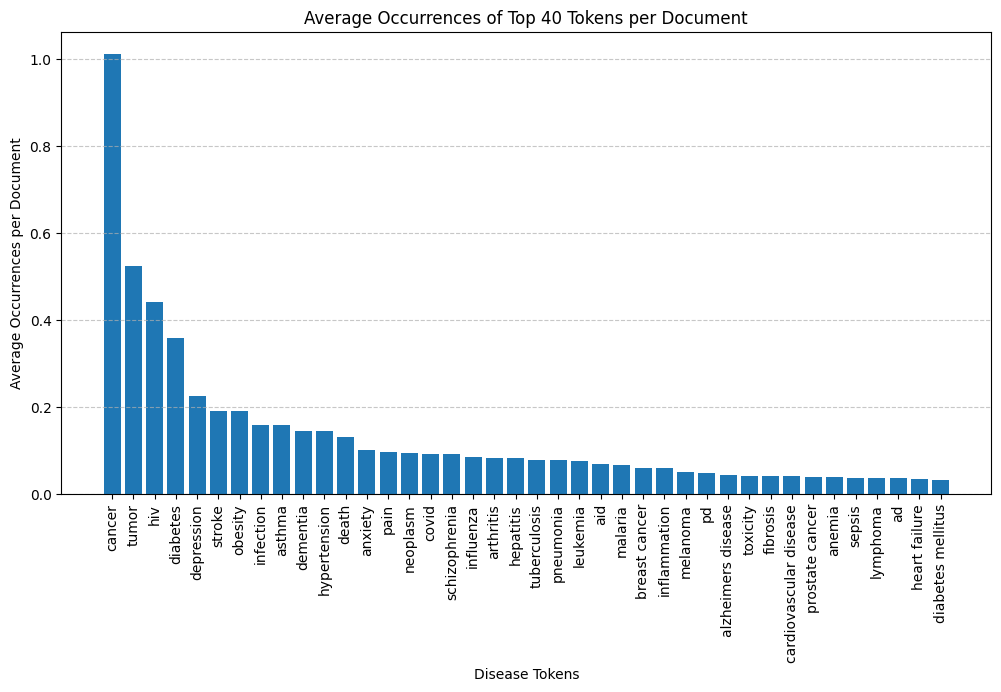

In [85]:
import matplotlib.pyplot as plt

disease_names = [disease for disease, count in most_common_diseases]
counts = [count for disease, count in most_common_diseases]

# Calculate the average occurrences per document
total_documents = len(df)  # Ensure `df` represents your dataset with one row per document
average_per_document = [count / total_documents for count in counts]

# Create a vertical bar chart for average occurrences per document
plt.figure(figsize=(12, 6))
plt.bar(disease_names, average_per_document)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Disease Tokens")
plt.ylabel("Average Occurrences per Document")
plt.title("Average Occurrences of Top 40 Tokens per Document")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


### Document-Level Frequency

In [86]:
document_disease_counter = Counter()

for token_list in df["merged_tokens_lemmatized"]:
    # set(token_list) ensures each token is only counted once per document
    unique_tokens = set(token_list)
    document_disease_counter.update(unique_tokens)

most_common_by_docs = document_disease_counter.most_common(40)
print("\nTop 40 Diseases by (Document-Level) Frequency:")
for disease, count in most_common_by_docs:
    print(f"{disease}: {count} articles")



Top 40 Diseases by (Document-Level) Frequency:
cancer: 137978 articles
tumor: 103004 articles
infection: 87288 articles
death: 77512 articles
neoplasm: 76719 articles
diabetes: 55487 articles
hiv: 43434 articles
inflammation: 38718 articles
hypertension: 38351 articles
pain: 33718 articles
cardiovascular disease: 30388 articles
depression: 29994 articles
obesity: 29620 articles
stroke: 28305 articles
alzheimers disease: 28269 articles
diabetes mellitus: 26531 articles
toxicity: 26153 articles
hiv infections: 23006 articles
covid: 22694 articles
carcinoma: 22404 articles
ad: 20728 articles
dementia: 20165 articles
alzheimer disease: 20018 articles
breast cancer: 19838 articles
fibrosis: 17750 articles
psychiatric: 17490 articles
pneumonia: 17477 articles
heart failure: 17048 articles
comorbidity: 16826 articles
arthritis: 16721 articles
leukemia: 16319 articles
coronary artery disease: 15843 articles
myocardial infarction: 15742 articles
anxiety: 15509 articles
hepatitis: 15474 article

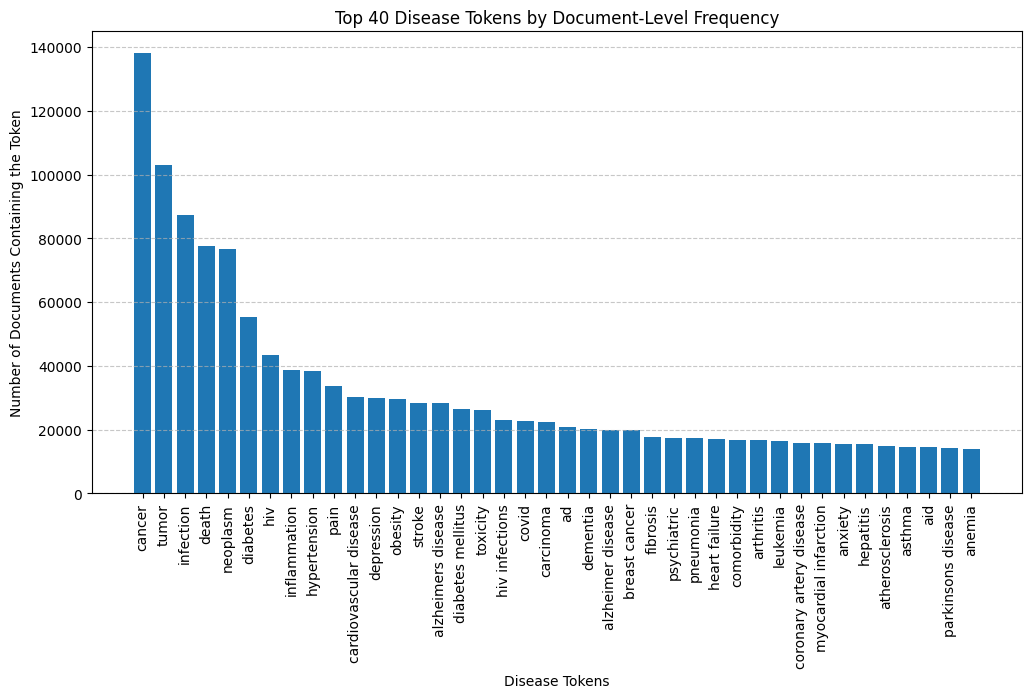

In [87]:
import matplotlib.pyplot as plt

disease_names_docs = [disease for disease, count in most_common_by_docs]
counts_docs = [count for disease, count in most_common_by_docs]

# Create a vertical bar chart for document-level frequency
plt.figure(figsize=(12, 6))
plt.bar(disease_names_docs, counts_docs)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Disease Tokens")
plt.ylabel("Number of Documents Containing the Token")
plt.title("Top 40 Disease Tokens by Document-Level Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


+-------------------------+--------+-----------------------------+
|      Disease Token      | Count  | Percentage of Documents (%) |
+-------------------------+--------+-----------------------------+
|          cancer         | 137978 |            13.04            |
|          tumor          | 103004 |             9.74            |
|        infection        | 87288  |             8.25            |
|          death          | 77512  |             7.33            |
|         neoplasm        | 76719  |             7.25            |
|         diabetes        | 55487  |             5.25            |
|           hiv           | 43434  |             4.11            |
|       inflammation      | 38718  |             3.66            |
|       hypertension      | 38351  |             3.63            |
|           pain          | 33718  |             3.19            |
|  cardiovascular disease | 30388  |             2.87            |
|        depression       | 29994  |             2.84         

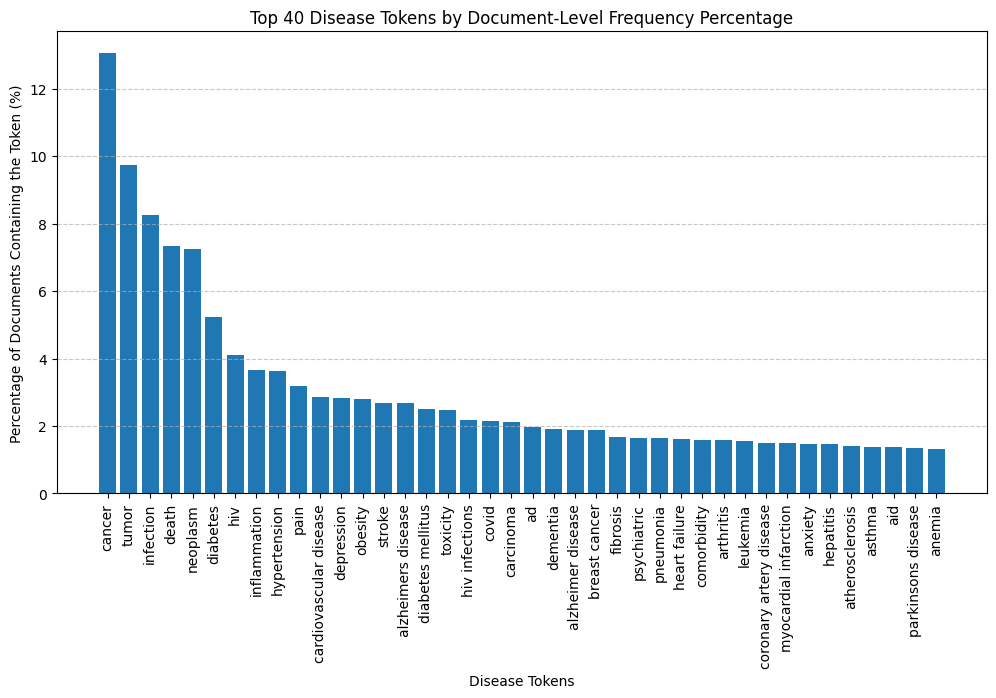

In [89]:
from prettytable import PrettyTable
import matplotlib.pyplot as plt

disease_names_docs = [disease for disease, count in most_common_by_docs]
counts_docs = [count for disease, count in most_common_by_docs]

# Calculate the percentage of total documents containing each token
total_documents = len(df) 
percentage_docs = [(count / total_documents) * 100 for count in counts_docs]

# Create a PrettyTable to display the percentages
table = PrettyTable()
table.field_names = ["Disease Token", "Count", "Percentage of Documents (%)"]
for disease, count, percentage in zip(disease_names_docs, counts_docs, percentage_docs):
    table.add_row([disease, count, f"{percentage:.2f}"])

# Print the PrettyTable
print(table)

# Create a vertical bar chart for document-level frequency percentages
plt.figure(figsize=(12, 6))
plt.bar(disease_names_docs, percentage_docs)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Disease Tokens")
plt.ylabel("Percentage of Documents Containing the Token (%)")
plt.title("Top 40 Disease Tokens by Document-Level Frequency Percentage")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


### TF - IDF

+----------------+--------------+
|     Token      | TF-IDF Score |
+----------------+--------------+
|     cancer     |   0.072277   |
|    disease     |   0.040330   |
|     tumor      |   0.034842   |
|      hiv       |   0.029838   |
|    diabetes    |   0.026707   |
|   infection    |   0.021971   |
|     death      |   0.014902   |
|    obesity     |   0.014767   |
|   depression   |   0.014394   |
|    diseases    |   0.014158   |
|     stroke     |   0.013511   |
|  hypertension  |   0.013494   |
|     covid      |   0.012848   |
|      pain      |   0.012682   |
|     heart      |   0.011996   |
|    dementia    |   0.011005   |
|    chronic     |   0.010121   |
| cardiovascular |   0.009791   |
|    syndrome    |   0.009708   |
|     asthma     |   0.009665   |
|   disorders    |   0.009370   |
|   hepatitis    |   0.009195   |
|    neoplasm    |   0.009137   |
|    failure     |   0.009115   |
|    leukemia    |   0.008693   |
|   arthritis    |   0.008625   |
|  inflammatio

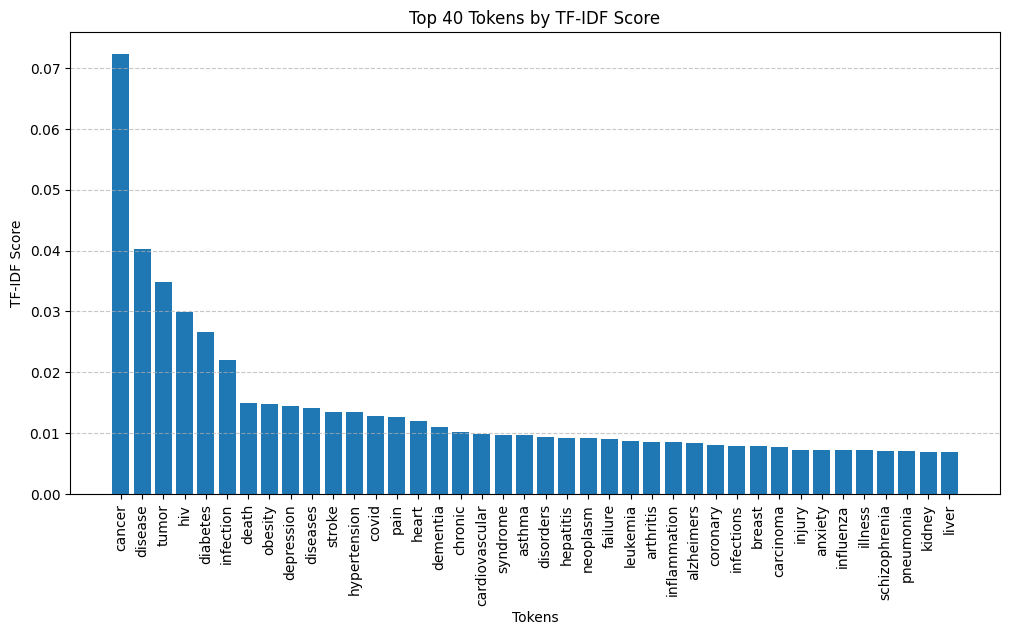

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Convert token lists into strings (needed for TfidfVectorizer)
documents = [" ".join(tokens) for tokens in df["merged_tokens_lemmatized"]]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Compute average TF-IDF scores
avg_tfidf = tfidf_matrix.mean(axis=0).A1  # Convert matrix to 1D array

# Create a list of TF-IDF values and corresponding words
tfidf_data = list(zip(feature_names, avg_tfidf))
tfidf_data.sort(key=lambda x: x[1], reverse=True)  # Sort by TF-IDF score

# Get the top 40 tokens by TF-IDF score
top_40_tfidf = tfidf_data[:40]
tokens_tfidf = [token for token, score in top_40_tfidf]
scores_tfidf = [score for token, score in top_40_tfidf]

# Create a PrettyTable for TF-IDF scores
table = PrettyTable()
table.field_names = ["Token", "TF-IDF Score"]
for token, score in top_40_tfidf:
    table.add_row([token, f"{score:.6f}"])

# Print the PrettyTable
print(table)

# Create a bar chart for TF-IDF scores
plt.figure(figsize=(12, 6))
plt.bar(tokens_tfidf, scores_tfidf)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Tokens")
plt.ylabel("TF-IDF Score")
plt.title("Top 40 Tokens by TF-IDF Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


### Topic Modeling with LDA (Example with Scikit-Learn)

In [ ]:
def join_tokens(token_list):
    return " ".join(token_list)

df["joined_tokens"] = df["merged_tokens_lemmatized"].apply(join_tokens)

print(df[["uid", "joined_tokens"]].head())


        uid                                      joined_tokens
0  10186596  hiv hiv hiv aid hiv aid hiv infections human i...
1  10186588                                                   
2  10186587                                                   
3  10163501  tumor tumor adenocarcinoma neoplasm ovarian ne...
4  10157383  american kidney failure renal failure renal fa...


In [101]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    min_df=10,      # ignore terms that appear in <10 documents
    max_df=0.9,     # ignore terms that appear in >90% of documents
    stop_words='english'  # or use a custom stopword list
)
dtm = vectorizer.fit_transform(df["joined_tokens"])


In [102]:
vectorizer

CountVectorizer(max_df=0.9, min_df=10, stop_words='english')

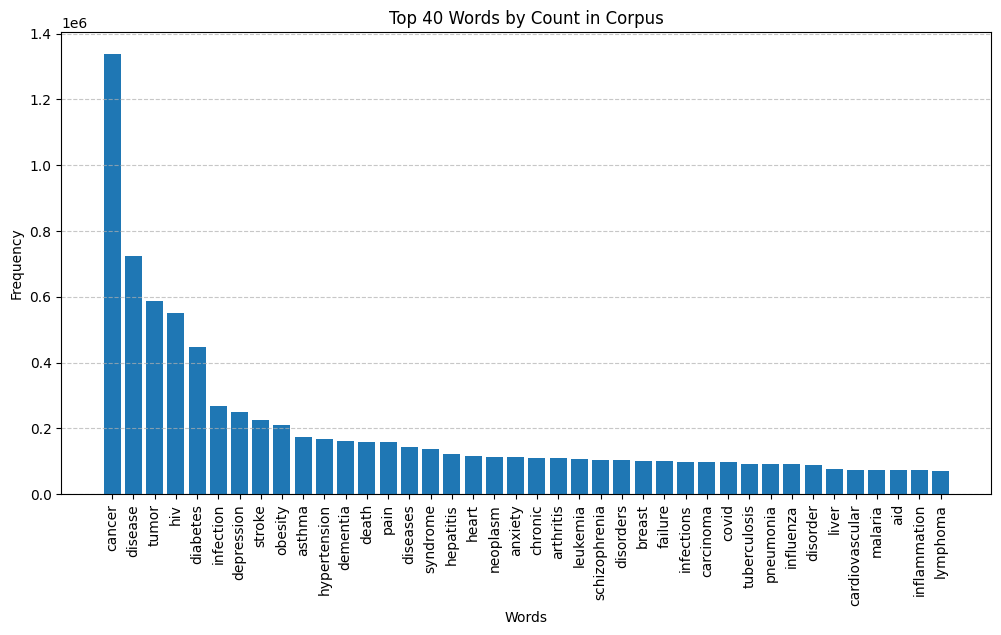

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Extract feature names and sum occurrences
feature_names = vectorizer.get_feature_names_out()
word_counts = np.asarray(dtm.sum(axis=0)).flatten()

# Create a dictionary of word counts
word_freq = dict(zip(feature_names, word_counts))
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Select the top 40 most frequent words
top_words = sorted_word_freq[:40]
words, counts = zip(*top_words)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 40 Words by Count in Corpus")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


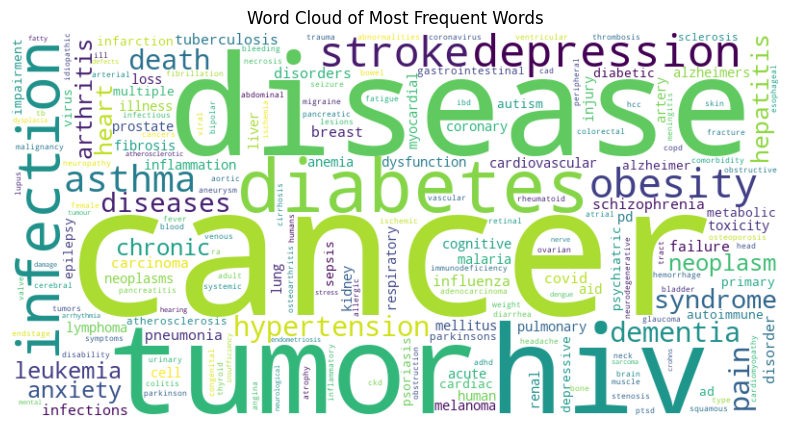

In [98]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axis labels
plt.title("Word Cloud of Most Frequent Words")
plt.show()


### LDA TRAINING

In [123]:
import numpy as np
import pandas as pd
from tqdm import tqdm  # for the progress bar
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [143]:
lda_model = LatentDirichletAllocation(
    n_components=100,   # number of topics
    random_state=420,
    learning_method='online',  # must be 'online' to use partial_fit
    max_iter=1,        # we do multiple passes manually
    batch_size=10_000
)

In [ ]:
num_docs = df.shape[0]

In [ ]:
lda_model.batch_size

In [144]:
num_docs = df.shape[0]
num_epochs = 5  # how many passes over entire dataset

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}...")
    
    # We can shuffle the rows for each epoch if we like (optional):
    # idxs = np.random.permutation(num_docs)
    # df = df.iloc[idxs].reset_index(drop=True)
    
    # Use tqdm for a progress bar over the batches
    for start_idx in tqdm(range(0, num_docs, lda_model.batch_size), desc="Batches"):
        end_idx = min(start_idx + lda_model.batch_size, num_docs)
        
        # Slice the data frame for this batch
        batch_texts = df["joined_tokens"].iloc[start_idx:end_idx].values
        
        # Convert to DTM using the existing vocab
        batch_dtm = vectorizer.transform(batch_texts)
        
        # partial_fit on the current batch
        lda_model.partial_fit(batch_dtm)

print("LDA training complete.")


Epoch 1/5...


Batches: 100%|██████████| 106/106 [01:59<00:00,  1.13s/it]


Epoch 2/5...


Batches: 100%|██████████| 106/106 [01:49<00:00,  1.04s/it]


Epoch 3/5...


Batches: 100%|██████████| 106/106 [01:48<00:00,  1.02s/it]


Epoch 4/5...


Batches: 100%|██████████| 106/106 [01:46<00:00,  1.01s/it]


Epoch 5/5...


Batches: 100%|██████████| 106/106 [01:47<00:00,  1.01s/it]

LDA training complete.


I iteration: Model Perplexity: 1793794.5377393323 -> 10 n comp

II iteration: Model Perplexity: 1323774.9414245177 -> 40 n comp

III iteration: Model Perplexity: 343.1623755049665 -> 100 n comp

In [154]:
# If you can fit the entire DTM in memory:
print("Model Perplexity:", lda_model.perplexity(dtm))



Model Perplexity: 343.1623755049665


In [182]:
# USE IF HEAVY MEMORY USAGE / COMPUTER GOES TO COSMOS
# import math

# log_likelihood = 0.0
# total_words = 0

# for start_idx in range(0, num_docs, chunk_size):
#     end_idx = min(start_idx + chunk_size, num_docs)
#     chunk_texts = df["joined_tokens"].iloc[start_idx:end_idx].values
#     batch_dtm = vectorizer.transform(chunk_texts)
    
#     # scikit-learn's LDA model has a "score" method = log-likelihood
#     # sum the log-likelihood for each chunk
#     log_likelihood += lda_model.score(batch_dtm)
#     total_words += batch_dtm.sum()

# # approximate perplexity = exp( - ( total log-likelihood ) / ( total number of words ) )
# perplexity = math.exp(-log_likelihood / total_words)
# print("Approximate Perplexity:", perplexity)


In [155]:
feature_names = vectorizer.get_feature_names_out()
n_top_words = 50

for topic_idx, topic_vals in enumerate(lda_model.components_):
    # topic_vals is an array of shape [n_features]
    # The bigger the value, the more the word is associated with the topic
    top_indices = topic_vals.argsort()[::-1][:n_top_words]
    top_terms = [feature_names[i] for i in top_indices]
    print(f"Topic {topic_idx}: {', '.join(top_terms)}")

Topic 0: inflammation, gout, sarcoidosis, bpd, granuloma, granulomatous, hand, cytokines, bronchopulmonary, disease, hyperuricemia, diseases, deformities, pvd, neisseria, cvid, cytokine, patellofemoral, sids, meningitidis, poliomyelitis, patellar, granulomas, neurosarcoidosis, strength, membrane, fibrotic, adenopathy, gouty, scabies, amebic, bppv, vaccineassociated, gonorrhoeae, tophus, thirst, sarcoid, cim, paralytic, formation, multisystem, hallux, noncaseating, epiglottitis, variable, damages, lipoatrophy, neurosensory, tophaceous, melorheostosis
Topic 1: cancer, neoplasm, neoplasms, cancers, disease, stage, metastasis, cervical, carcinogenesis, mssa, deaths, cancerrelated, earlystage, breast, erpositive, her2negative, receptorpositive, anderson, her2, rectal, chek2, prognosis, nonmetastatic, adult, neoplastic, precancerous, ernegative, precancer, advancedstage, hboc, ajcc, estrogen, aggressive, cancerassociated, breastovarian, adjuvant, primary, noncutaneous, brca2, curable, cancer

In [156]:
# ----------------------------------------------------------------
# 5) Transform to get doc-topic distributions
# ----------------------------------------------------------------
chunk_size = 10_000
doc_topic_distributions = []
for start_idx in range(0, num_docs, chunk_size):
    end_idx = min(start_idx + chunk_size, num_docs)
    batch_texts = df["joined_tokens"].iloc[start_idx:end_idx].values
    batch_dtm = vectorizer.transform(batch_texts)  # same vocab
    
    topic_dist = lda_model.transform(batch_dtm)
    doc_topic_distributions.append(topic_dist)

doc_topic_distributions = np.vstack(doc_topic_distributions)
print(doc_topic_distributions.shape)
# e.g., (num_docs, 50)

(1057871, 100)


In [157]:
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10

for topic_idx, topic_vals in enumerate(lda_model.components_):
    top_indices = topic_vals.argsort()[::-1][:n_top_words]
    top_terms = [feature_names[i] for i in top_indices]
    print(f"Topic {topic_idx}: {', '.join(top_terms)}")


Topic 0: inflammation, gout, sarcoidosis, bpd, granuloma, granulomatous, hand, cytokines, bronchopulmonary, disease
Topic 1: cancer, neoplasm, neoplasms, cancers, disease, stage, metastasis, cervical, carcinogenesis, mssa
Topic 2: liver, fibrosis, disease, cirrhosis, celiac, hepatic, polycystic, steatosis, diseases, cf
Topic 3: psoriasis, bowel, neuroblastoma, abscess, ibs, hemophilia, irritable, functional, nb, stature
Topic 4: melanoma, retinal, malignant, neoplasm, cutaneous, angioedema, detachment, uveal, neoplasms, diseases
Topic 5: abuse, alcoholism, familial, adiposity, alcohol, tinnitus, dependence, polyposis, alcoholrelated, fog
Topic 6: obstruction, airway, sd, disease, laryngeal, prs, tubular, chagas, sjogrens, genetic
Topic 7: thrombocytopenia, bacteremia, thrombotic, osteomyelitis, purpura, ttp, agerelated, thrombocytopenic, vitiligo, itp
Topic 8: prostate, adenocarcinoma, cancer, hyperplasia, neoplasm, prostatic, aggressive, disease, castrationresistant, highgrade
Topic 9

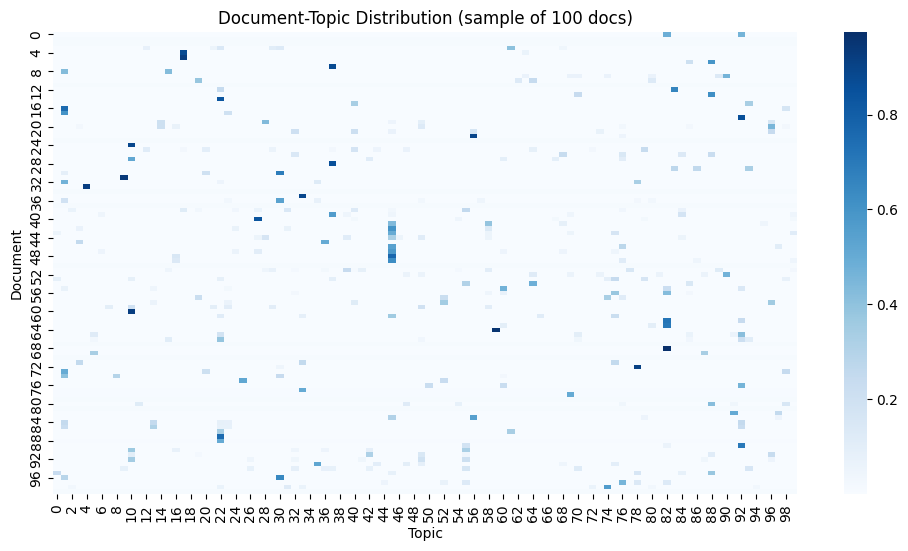

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# doc_topic_distributions is often quite large; let's pick the first 100 docs
sample_distribution = doc_topic_distributions[:100]

plt.figure(figsize=(12, 6))
sns.heatmap(sample_distribution, cmap="Blues")  
plt.xlabel("Topic")
plt.ylabel("Document")
plt.title("Document-Topic Distribution (sample of 100 docs)")
plt.show()


In [159]:
#!pip install pyLDAvis

In [165]:
# TAKES TOO MUCH TIME TO PROCESS

# import pyLDAvis
# import pyLDAvis.lda_model  # Use lda_model instead of sklearn
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import CountVectorizer

# # Vectorize your documents
# vectorizer = CountVectorizer(stop_words='english')
# dtm = vectorizer.fit_transform(documents)

# # Fit the LDA model
# lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
# lda_model.fit(dtm)

# # Prepare the visualization
# pyLDAvis.enable_notebook()  # Use this if you're in a Jupyter notebook
# panel = pyLDAvis.lda_model.prepare(lda_model, dtm, vectorizer, mds='tsne')
# pyLDAvis.display(panel)


In [166]:
# To much n components for this graph

# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming 'lda_model' is your trained LDA model and 'feature_names' from CountVectorizer
# n_top_words = 10  # Number of words to display per topic

# plt.figure(figsize=(12, 8))

# for topic_idx, topic_vals in enumerate(lda_model.components_):
#     top_indices = topic_vals.argsort()[::-1][:n_top_words]
#     top_terms = [feature_names[i] for i in top_indices]
#     top_scores = [topic_vals[i] for i in top_indices]

#     plt.barh(top_terms[::-1], top_scores[::-1], alpha=0.7, label=f"Topic {topic_idx}")

# plt.xlabel("Word Score")
# plt.ylabel("Top Words")
# plt.title("Top 10 Words per Topic")
# plt.legend()
# plt.show()


In [181]:
# import seaborn as sns

# # Assuming 'doc_topic_distributions' is your document-topic matrix from LDA.transform
# plt.figure(figsize=(12, 6))
# sns.heatmap(doc_topic_distributions[:50], cmap="Blues", xticklabels=[f"Topic {i}" for i in range(lda_model.n_components)])
# plt.xlabel("Topics")
# plt.ylabel("Documents (First 50)")
# plt.title("Document-Topic Distribution (First 50 Documents)")
# plt.show()


#### Identify Top Documents for a Given Topic

In [186]:
# import numpy as np

# # doc_topic_distributions has shape [num_docs, n_topics]

# def top_documents_for_topic(topic_id, doc_topic_matrix, top_n=10):
#     """
#     Returns the indices of the documents with the highest
#     probability for the given 'topic_id'.
#     """
#     # doc_topic_matrix[:, topic_id] is the probability of each doc belonging to 'topic_id'
#     topic_column = doc_topic_matrix[:, topic_id]
#     # Get indices sorted by descending probability
#     top_doc_indices = np.argsort(topic_column)[::-1][:top_n]
#     return top_doc_indices

# # Example usage:
# topic_id = 0
# top_docs = top_documents_for_topic(topic_id, doc_topic_distributions, top_n=5)
# print(f"Top 5 docs for topic {topic_id}:", top_docs)

# # Then you can print e.g. their abstracts or text:
# for idx in top_docs:
#     print("Doc index:", idx, "Probability:", doc_topic_distributions[idx, topic_id])
#     print("Text:", df["joined_tokens"].iloc[idx])
#     print("---")


#### Trend Over Time

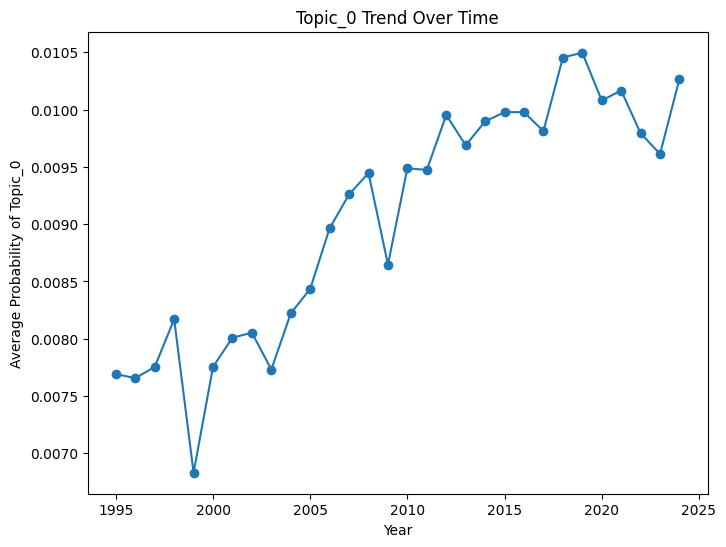

In [167]:
df["year"] = pd.to_datetime(df["parsed_date"]).dt.year

# Suppose doc_topic_distributions is aligned with df rows
df_topics = pd.DataFrame(doc_topic_distributions, columns=[f"Topic_{i}" for i in range(doc_topic_distributions.shape[1])])
df_topics["year"] = df["year"].values

# Average each topic by year
yearly_topic_means = df_topics.groupby("year").mean()

# Plot an example of how Topic_0 changes over time
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(yearly_topic_means.index, yearly_topic_means["Topic_0"], marker='o')
plt.title("Topic_0 Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Average Probability of Topic_0")
plt.show()


#### Topic Similarity

Topic-Topic Similarity (cosine):
 [[1.         0.08024123 0.09329842 0.09368439 0.2488483  0.07084037
  0.11893169 0.00662999 0.24672999 0.02332407]
 [0.08024123 1.         0.03602879 0.03638549 0.0942601  0.05642789
  0.06599598 0.00289547 0.15633486 0.00700079]
 [0.09329842 0.03602879 1.         0.07338697 0.26317944 0.16758207
  0.10422595 0.03838489 0.18187889 0.01299749]
 [0.09368439 0.03638549 0.07338697 1.         0.18935895 0.05049036
  0.09829974 0.00424565 0.23625037 0.04516789]
 [0.2488483  0.0942601  0.26317944 0.18935895 1.         0.2090688
  0.28859943 0.03150881 0.47275055 0.07075765]
 [0.07084037 0.05642789 0.16758207 0.05049036 0.2090688  1.
  0.08244866 0.06280559 0.13644183 0.00965102]
 [0.11893169 0.06599598 0.10422595 0.09829974 0.28859943 0.08244866
  1.         0.01168824 0.28756041 0.02100398]
 [0.00662999 0.00289547 0.03838489 0.00424565 0.03150881 0.06280559
  0.01168824 1.         0.0136592  0.0010509 ]
 [0.24672999 0.15633486 0.18187889 0.23625037 0.4727505

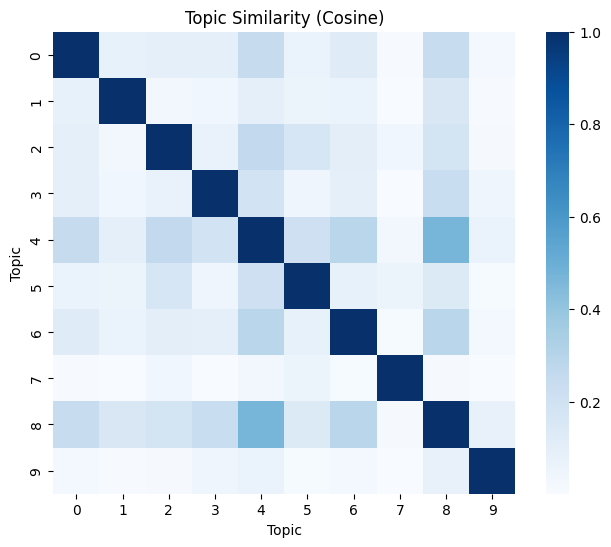

In [184]:
from sklearn.metrics.pairwise import cosine_similarity

# shape: (n_topics, vocab_size)
topic_word_matrix = lda_model.components_

# Convert to normalized vectors if you want pure cosine similarity of distributions
topic_word_matrix_norm = topic_word_matrix / (topic_word_matrix.sum(axis=1, keepdims=True) + 1e-10)

similarity_matrix = cosine_similarity(topic_word_matrix_norm)
print("Topic-Topic Similarity (cosine):\n", similarity_matrix)

# You can visualize with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(similarity_matrix, cmap="Blues", square=True)
plt.title("Topic Similarity (Cosine)")
plt.xlabel("Topic")
plt.ylabel("Topic")
plt.show()


#### Topic Coherence

In [169]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel

tokenized_docs = [text.split() for text in df["joined_tokens"]]

# Build a Gensim dictionary
dictionary = corpora.Dictionary(tokenized_docs)
dictionary.filter_extremes(no_below=5, no_above=0.9) 

# Build the corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Convert sklearn topics to a list of top words
top_words_per_topic = []
n_top_words = 20
feature_names = vectorizer.get_feature_names_out()

for t in range(lda_model.n_components):
    comp = lda_model.components_[t]  # word scores for topic t
    top_indices = comp.argsort()[::-1][:n_top_words]
    topic_words = [feature_names[i] for i in top_indices]
    top_words_per_topic.append(topic_words)

# Now create the coherence model
coherence_model = CoherenceModel(
    topics=top_words_per_topic,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'  # or 'u_mass', 'c_uci', 'c_npmi'
)
coherence_score = coherence_model.get_coherence()
print("Topic Coherence (c_v):", coherence_score)


Topic Coherence (c_v): 0.37421133592071654


## LDA APROACH - 2 - TOP 1000 TOKENS

In [180]:
###############################################
# (A) Pick Top 1,000 Tokens
###############################################
feature_names = vectorizer.get_feature_names_out()
word_counts = np.asarray(dtm.sum(axis=0)).flatten()
word_freq = dict(zip(feature_names, word_counts))
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

top_1000 = [token for token, freq in sorted_word_freq[:1000]]
print("Top-1k tokens selected.")

###############################################
# (B) New Vectorizer for top-1k tokens only
###############################################
vectorizer_top1k = CountVectorizer(vocabulary=top_1000)

###############################################
# (C) LDA on partial-fit with top-1k vocab
###############################################
lda_model_top1k = LatentDirichletAllocation(
    n_components=25,
    random_state=999,
    learning_method='online',
    max_iter=1,
    batch_size=10000
)

num_docs = df.shape[0]
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}...")
    for start_idx in range(0, num_docs, lda_model_top1k.batch_size):
        end_idx = min(start_idx + lda_model_top1k.batch_size, num_docs)
        
        batch_texts = df["joined_tokens"].iloc[start_idx:end_idx].values
        batch_dtm_top1k = vectorizer_top1k.transform(batch_texts)
        
        lda_model_top1k.partial_fit(batch_dtm_top1k)

print("Done training LDA on top-1k tokens.")

###############################################
# (D) Perplexity & Topics
###############################################
dtm_top1k_full = vectorizer_top1k.transform(df["joined_tokens"])
print("Perplexity on full data (restricted vocab):", lda_model_top1k.perplexity(dtm_top1k_full))

feature_names_1k = vectorizer_top1k.get_feature_names_out()
n_top_words = 10
for topic_idx, topic_vals in enumerate(lda_model_top1k.components_):
    top_indices = topic_vals.argsort()[::-1][:n_top_words]
    top_terms = [feature_names_1k[i] for i in top_indices]
    print(f"Topic {topic_idx}: {', '.join(top_terms)}")

###############################################
# (E) Doc-Topic Distributions
###############################################
doc_topic_distributions_1k = lda_model_top1k.transform(dtm_top1k_full)
print(doc_topic_distributions_1k.shape)  # (num_docs, n_components)


Top-1k tokens selected.
Epoch 1/5...
Epoch 2/5...
Epoch 3/5...
Epoch 4/5...
Epoch 5/5...
Done training LDA on top-1k tokens.
Perplexity on full data (restricted vocab): 76.71239444500635
Topic 0: diabetes, asthma, syndrome, mellitus, disease, cardiovascular, diabetic, autoimmune, metabolic, diseases
Topic 1: schizophrenia, disease, disorder, artery, autism, coronary, disorders, atherosclerosis, psychiatric, aortic
Topic 2: leukemia, malaria, psoriasis, glaucoma, toxicity, acute, retinal, neuropathy, nerve, myeloid
Topic 3: disease, pd, fibrosis, inflammation, parkinsons, migraine, pancreatitis, ibd, bowel, muscle
Topic 4: obesity, infection, infections, loss, weight, gastrointestinal, disease, diarrhea, infectious, diseases
Topic 5: anxiety, influenza, liver, melanoma, disease, cirrhosis, fatty, nafld, nonalcoholic, disability
Topic 6: arthritis, tuberculosis, respiratory, tb, rheumatoid, ra, fever, atrial, tract, infection
Topic 7: hypertension, disease, kidney, chronic, pulmonary, re

I iteration: 69 is probably pretty good perplexity, at least comparing to previous perplexities, n comp -> 20

II iteration: 76 is probably pretty good perplexity, at least comparing to previous perplexities, n comp -> 15

In [176]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# 1. Build Gensim Dictionary & Corpus

# If each row of df["joined_tokens"] is a single string, split it into tokens:
tokenized_docs = [text.split() for text in df["joined_tokens"]]

# Build a Gensim dictionary
dictionary = corpora.Dictionary(tokenized_docs)

# Filter out extremely rare or frequent tokens
dictionary.filter_extremes(no_below=5, no_above=0.9)

# Build the bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

print(f"Gensim dictionary size after filtering: {len(dictionary)}")

# 2. Extract Top Words from the Top-1k LDA Model
lda_model_top1k
vectorizer_top1k = CountVectorizer(vocabulary=top_1000)  # The restricted vocab

# 3. Compute the Coherence Score (c_v, for instance)
coherence_model = CoherenceModel(
    topics=top_words_per_topic,  # list of lists of top words
    texts=tokenized_docs,       
    dictionary=dictionary,
    coherence='c_v'              # or 'u_mass', 'c_uci', 'c_npmi'
)

coherence_score = coherence_model.get_coherence()
print("Topic Coherence (c_v):", coherence_score)



Gensim dictionary size after filtering: 31911
Topic Coherence (c_v): 0.37421133592071654


But topic coherence is Topic Coherence (c_v): 0.37421133592071654 (old; whole dataset) = Topic Coherence (c_v): 0.37421133592071654

In [185]:
from gensim.corpora import Dictionary

# 1) Filter your tokenized_docs to keep only words in top_1000
filtered_docs = []
for doc in tokenized_docs:
    filtered_doc = [w for w in doc if w in top_1000]
    filtered_docs.append(filtered_doc)

# 2) Build a dictionary from filtered_docs
dictionary_1k = Dictionary(filtered_docs)
dictionary_1k.compactify()

# 3) Build the BOW corpus from the filtered docs
corpus_1k = [dictionary_1k.doc2bow(doc) for doc in filtered_docs]

# 4) Then create the coherence model the same way:
coherence_model = CoherenceModel(
    topics=top_words_per_topic,  # from LDA model that used top1k
    texts=filtered_docs,
    dictionary=dictionary_1k,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()
print("Topic Coherence (c_v) with restricted dictionary:", coherence_score)

Topic Coherence (c_v) with restricted dictionary: 0.3731806367247317


In [ ]:
#### Word Cloud of the 1k Vocabulary

## Topic Modeling with Gensim (an Alternative)

### Convert Each Document to a List of Tokens

In [ ]:
#pip install --upgrade gensim

In [173]:
df["merged_tokens_lemmatized"]

0          [hiv, hiv, hiv, aid, hiv, aid, hiv infections,...
1                                                         []
2                                                         []
3          [tumor, tumor, adenocarcinoma, neoplasm, ovari...
4          [american kidney failure, renal failure, renal...
                                 ...                        
1057866                                           [behavior]
1057867    [adenotonsillectomy, obstructive sleep apnea, ...
1057868       [malnutrition, chronic diseases, malnutrition]
1057869                                [death, death, death]
1057870    [cerebral arteriovenous malformation, arteriov...
Name: merged_tokens_lemmatized, Length: 1057871, dtype: object

In [174]:
docs = df["merged_tokens_lemmatized"].tolist()  # each element is a list of tokens


### Build Dictionary & Corpus

In [175]:
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)

# Filter out rare and common tokens
dictionary.filter_extremes(no_below=10, no_above=0.9)  # adjust thresholds

# Create a BOW (bag-of-words) corpus
corpus = [dictionary.doc2bow(doc) for doc in docs]


#### Train LDA in Gensim

In [177]:
from gensim.models.ldamodel import LdaModel

num_topics = 10
lda_gensim = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=5,      # number of passes through the corpus
    chunksize=10_000 # batch size in words
)


#### Explore Topics (Gensim)

In [178]:
for idx, topic in lda_gensim.show_topics(num_topics=num_topics, num_words=15, formatted=False):
    print(f"Topic #{idx}:")
    print(" ".join([word for word, weight in topic]))
    print("")


Topic #0:
depression anxiety disease disorder disorders pd parkinsons autism depressive psychiatric syndrome neurodegenerative parkinson muscle illness

Topic #1:
hiv covid infection infections influenza pneumonia disease respiratory coronavirus virus glaucoma aid syndrome sarscov2 2019

Topic #2:
disease tuberculosis failure heart kidney pulmonary chronic fibrosis psoriasis ckd ibd renal copd tb injury

Topic #3:
cancer tumor breast carcinoma neoplasm neoplasms melanoma prostate cell lung colorectal death toxicity ovarian adenocarcinoma

Topic #4:
pain disease lymphoma inflammation bowel fatigue colitis inflammatory loss gastrointestinal fever adhd crohns diseases chronic

Topic #5:
diabetes dementia disease liver hepatitis alzheimers cognitive ad mellitus alzheimer impairment cirrhosis diabetic hcc fatty

Topic #6:
obesity hypertension malaria arthritis epilepsy migraine metabolic weight ra syndrome osteoarthritis rheumatoid seizure dermatitis loss

Topic #7:
asthma leukemia schizoph

## Tracking Trends Over Time

## Bar Chart of the Top Words in the Restricted Vocabulary

## Disease Counts by Year

In [179]:
import pandas as pd

# Suppose parsed_date is actually a datetime; if it’s just a string, parse it
df["year"] = pd.to_datetime(df["parsed_date"]).dt.year

disease_trends = {}

for year, group_df in df.groupby("year"):
    year_counter = Counter()
    for token_list in group_df["merged_tokens_lemmatized"]:
        year_counter.update(set(token_list))  # doc-level or token-level
    disease_trends[year] = year_counter

# Now disease_trends[year] is a Counter object for that year


KeyError: 'merged_tokens_norm'

In [ ]:
disease_name = "cancer"  # for example

for year in sorted(disease_trends.keys()):
    print(year, disease_trends[year][disease_name])


In [ ]:
data_for_df = []
for year in sorted(disease_trends.keys()):
    data_for_df.append({
        "year": year,
        disease_name: disease_trends[year][disease_name]
    })

disease_year_df = pd.DataFrame(data_for_df)
print(disease_year_df)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(disease_year_df["year"], disease_year_df[disease_name], marker='o')
plt.xlabel("Year")
plt.ylabel(f"Document Count for {disease_name}")
plt.title(f"Trend of {disease_name} Over Time")
plt.show()


## Topic Trends Over Time

In [ ]:
topic_distributions = lda_model.transform(dtm)  
# shape = [num_documents x num_topics]

df_topics = pd.DataFrame(topic_distributions, columns=[f"topic_{i}" for i in range(n_topics)])
df_topics["year"] = df["year"].values

# Group by year and average
yearly_topic_means = df_topics.groupby("year").mean()
# Plot or inspect
print(yearly_topic_means.head())


                     Token    Weight
0                   cancer  129142.0
1                    tumor   70306.0
2                infection   59244.0
3                    death   57596.0
4                 diabetes   54675.0
5                      hiv   42895.0
6             inflammation   35920.0
7             hypertension   34894.0
8               infections   30246.0
9                   tumors   30081.0
10                    pain   29387.0
11              depression   28239.0
12  cardiovascular disease   27459.0
13     Alzheimer's disease   26525.0
14                 obesity   25677.0
15                  stroke   24363.0
16                   covid   22085.0
17                toxicity   20666.0
18                      AD   20657.0
19                  deaths   20208.0


In [ ]:
## Visualizing Results